<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%203%20Deep%20Learning/CNN_basic/CNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN Implementation

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# train dataset -> 60K
# test sample -> 10K

In [4]:
# Data preprocessing
X_train = X_train.reshape(-1, 28,28,1).astype('float32')/255.0
X_test = X_test.reshape(-1, 28,28,1).astype('float32')/255.0

In [5]:
# define model

model= Sequential([
    # step 1: create a convolution layer
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ),
    MaxPooling2D(pool_size=(2,2)),

    # step 2: flatten layer
    Flatten(),

    # step 3: hidden layer
    Dense(128, activation='relu'),

    # step 4: Output layer
    Dense(10, activation='softmax')
]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# train model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9554 - loss: 0.1535 - val_accuracy: 0.9558 - val_loss: 0.1502
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9551 - loss: 0.1502 - val_accuracy: 0.9586 - val_loss: 0.1386
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9586 - loss: 0.1352 - val_accuracy: 0.9593 - val_loss: 0.1329
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9613 - loss: 0.1276 - val_accuracy: 0.9632 - val_loss: 0.1237
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9631 - loss: 0.1240 - val_accuracy: 0.9617 - val_loss: 0.1249
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9643 - loss: 0.1218 - val_accuracy: 0.9625 - val_loss: 0.1236
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9655 - loss: 0.1143 - val_accuracy: 0.9634 - val_loss: 0.1190
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9666 - loss: 0.1081 - val_accuracy: 0.

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1228
0.9690999984741211


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


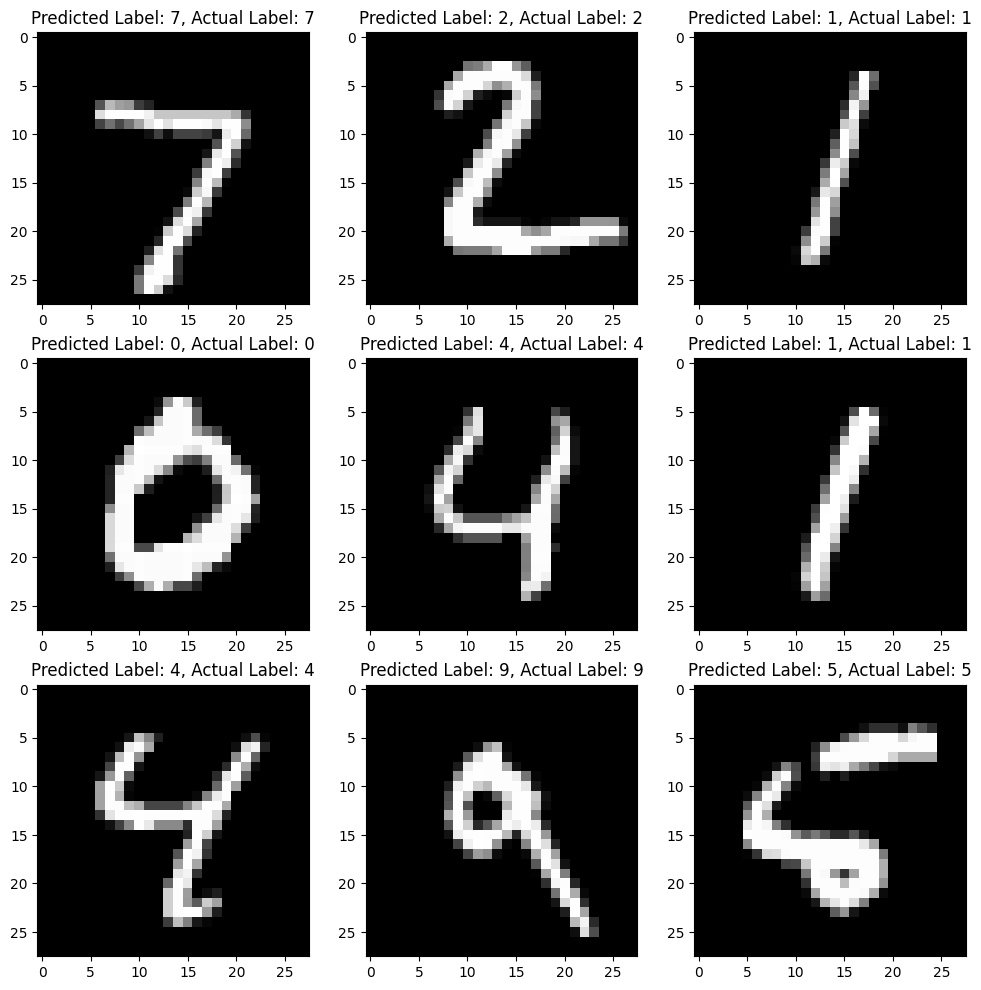

In [10]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test[:9]) # predict 9 images
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 12))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted Label: {predicted_labels[i]}, Actual Label: {y_test[i]}")
plt.show()